# Week 5 - Mathematical computation in Python
***
# Part 1 - SymPy

In [1]:
from sympy import *

## Exercise 1 - Getting familiar with SymPy

***
**Question 1.**

In [2]:
display(pi.evalf())
display(E.evalf())

3.14159265358979

2.71828182845905

***
**Question 2.**

In [3]:
display(cos(pi/2))
display(log(E**2))

0

2

***
**Question 3.**

In [4]:
e = exp(1)
display(e.evalf())

2.71828182845905

***
**Question 4.**

In [5]:
a = Rational(1, 13)
display(a)

1/13

***
**Question 5.**

In [6]:
f = Rational(43, 452) + Rational(54, 725) - Rational(10, 98)
display(f)

1085067/16057300

***
## Exercise 2 - Functions

**Question 1.**

In [7]:
x = symbols('x')
y = (x**2 - 4 * x + 3) / (1 + x**2)

# evaluate at x = 0 and x = 4
display(y.subs(x, 0))
display(y.subs(x, 4))
display(y.subs(x, 4.0))

3

3/17

0.176470588235294

***
**Question 2.**

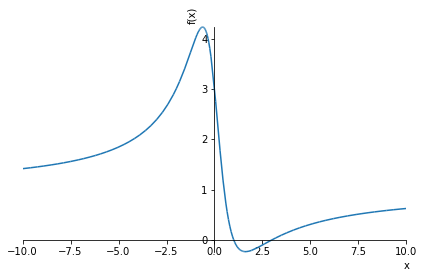

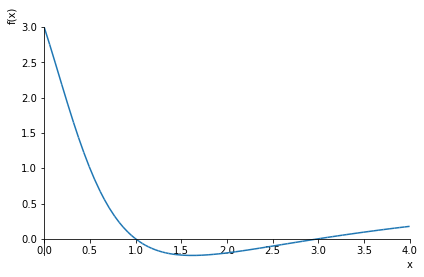

In [8]:
# plotting y over the domain -10 < x < 10
plot(y)

# plotting y over the domain 0 < x < 4
plot(y, (x, 0, 4))

***
**Question 3.**

In [9]:
sols = solve(y, x)
display(sols)

[1, 3]

***
**Question 4.**

In [10]:
L = limit(y, x, oo)
display(L)

1

***
**Question 5.**

In [11]:
y_p = diff(y, x)
display(y_p.subs(x, 0))

-4

***
**Question 6.**

In [12]:
A = integrate(y, (x, 0, 1))
display(A)
display(A.evalf())

-2*log(2) + 1 + pi/2

1.18450196567501

***
**Question 7.**

In [13]:
# solve the equation y'(x) = 0 for x and store the values in a list L
L = solve(y_p, x)
display(L)

# store the entries in the list and compute floating-point approximations
x_1 = L[0]
x_2 = L[1]

print('x_1 =', x_1.evalf())
print('x_2 =', x_2.evalf())

# by analying the plot we see that x_1 gives the location of the max whereas x_2 gives the location of the min.
# we now calculate floating-point approximations to the max and min of y and print the result
y_min = y.subs(x, x_1).evalf()
y_max = y.subs(x, x_2).evalf()

print('the max of y is', y_max)
print('the min of y is', y_min)

# now we'll check the sign of y''(x) at these points
y_pp = diff(y, x, 2)
print('the sign of y\'\'(x_1) is', y_pp.subs(x, x_1).evalf())
print('the sign of y\'\'(x_1) is', y_pp.subs(x, x_2).evalf())

# since y''(x_1) < 0 this point is a max
# since y''(x_2) > 0 this point is a min

[1/2 - sqrt(5)/2, 1/2 + sqrt(5)/2]

x_1 = -0.618033988749895
x_2 = 1.61803398874989
the max of y is -0.236067977499790
the min of y is 4.23606797749979
the sign of y''(x_1) is -4.68328157299975
the sign of y''(x_1) is 0.683281572999748


***
## Exercise 3 - Modelling a pandemic

**Question 1.**  We create all of the symbols at once.  Another approach is to use different lines to create the symbols one-by-one

In [14]:
t, r, K, P_0 = symbols('t r K P_0')

P = P_0 * K / (P_0 + (K - P_0) * exp(-r * t))

***
**Question 2.**

In [15]:
params = {r:0.1, K:67, P_0:0.5}

***
**Question 3.**

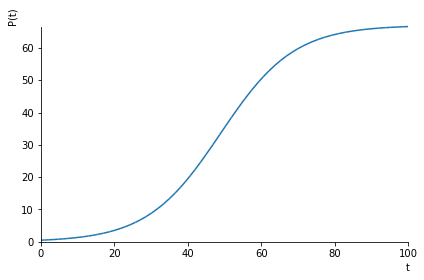

In [16]:
plot(P.subs(params), (t, 0, 100), ylabel="P(t)")

***
**Question 4.**

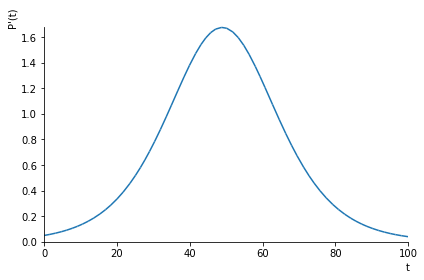

In [17]:
P_prime = diff(P, t)
plot(P_prime.subs(params), (t, 0, 100), ylabel="P'(t)")

From this graph we see that population of infected individuals is growing the fastest about 50 days after the outbreak.

***
**Question 5.**

In [18]:
# solve the equation and store the result in t_half
t_half = solve(P - K/2, t)

# the solve function returns the solution in a list, so we extract the first entry in a list and overwrite t_half
t_half = t_half[0]

# display the result
display(t_half)

log((K - P_0)/P_0)/r

**Question 6**.

In [19]:
# substituting in the original parameter values
display(t_half.subs(params))

# here we are using the copy method to copy the original dictionary into a new one
params2 = params.copy()

# now we edit the value of r (since dictionaries are mutable)
params2[r] = 0.05

# finally, we evaluate the solution t_half using the new set of parameter values
display(t_half.subs(params2))

48.9034912822175

97.8069825644351

## Exercise 4 - The roots of unity

***
**Question 1.**

In [20]:
z = symbols('z')
L_exact = solve(z**10 - 1)
display(L_exact)

[-1,
 1,
 -1/4 + sqrt(5)/4 - I*sqrt(sqrt(5)/8 + 5/8),
 -1/4 + sqrt(5)/4 + I*sqrt(sqrt(5)/8 + 5/8),
 1/4 + sqrt(5)/4 - I*sqrt(5/8 - sqrt(5)/8),
 1/4 + sqrt(5)/4 + I*sqrt(5/8 - sqrt(5)/8),
 -sqrt(5)/4 - 1/4 - I*sqrt(5/8 - sqrt(5)/8),
 -sqrt(5)/4 - 1/4 + I*sqrt(5/8 - sqrt(5)/8),
 -sqrt(5)/4 + 1/4 - I*sqrt(sqrt(5)/8 + 5/8),
 -sqrt(5)/4 + 1/4 + I*sqrt(sqrt(5)/8 + 5/8)]

***
**Question 2.**

In [21]:
L_float = [l.evalf() for l in L_exact]
display(L_float)


[-1.00000000000000,
 1.00000000000000,
 0.309016994374947 - 0.951056516295154*I,
 0.309016994374947 + 0.951056516295154*I,
 0.809016994374947 - 0.587785252292473*I,
 0.809016994374947 + 0.587785252292473*I,
 -0.809016994374947 - 0.587785252292473*I,
 -0.809016994374947 + 0.587785252292473*I,
 -0.309016994374947 - 0.951056516295154*I,
 -0.309016994374947 + 0.951056516295154*I]

***
**Question 3.**

In [22]:
L = [exp(2*pi*I*m/10) for m in range(10)]
L = [l.evalf() for l in L]
display(L)

[1.00000000000000,
 0.809016994374947 + 0.587785252292473*I,
 0.309016994374947 + 0.951056516295154*I,
 -0.309016994374947 + 0.951056516295154*I,
 -0.809016994374947 + 0.587785252292473*I,
 -1.00000000000000,
 -0.809016994374947 - 0.587785252292473*I,
 -0.309016994374947 - 0.951056516295154*I,
 0.309016994374947 - 0.951056516295154*I,
 0.809016994374947 - 0.587785252292473*I]

***
**Question 4.**

The $n$-th roots of unity are given by
$$
z = e^{2 \pi i m / n}, \quad m = 0, 1, \ldots n-1
$$

## Exercise 5 - The period of a pendulum

***
**Question 1.**

In [23]:
m = 1
g = 9.8
L = 0.5

T = 2 * pi.evalf() * sqrt(L / g)
print(T)

1.41922689511373


***
**Question 2.**

In [24]:
theta_0 = pi.evalf() / 4
theta = symbols('theta')

T = 2 * sqrt(L / g) * integrate(1 / sqrt(2 * (cos(theta) - cos(theta_0))), (theta, -theta_0, theta_0)).evalf()

# print the real part of T, discarding the small complex part
print(re(T))

1.47595814775915


***
**Question 3.**

In [25]:
# use list comprehension to create a list of the values of theta_0
theta_0 = [0.1 * n * pi.evalf() for n in range(1,9)]

# use a for loop to iterate over the values of theta_0
for t in theta_0:
    
    # compute the period
    T = 2 * sqrt(L / g) * integrate(1 / sqrt(2 * (cos(theta) - cos(t))), (theta, -t, t)).evalf()
    
    # print the results.  here we use the re() function
    # to compute the real part
    print("theta_0 =", t, ", T =", re(T))    

theta_0 = 0.314159265358979 , T = 1.42803119698908
theta_0 = 0.628318530717959 , T = 1.45505804464812
theta_0 = 0.942477796076938 , T = 1.50227699842791
theta_0 = 1.25663706143592 , T = 1.57345831528626
theta_0 = 1.57079632679490 , T = 1.67517112351829
theta_0 = 1.88495559215388 , T = 1.81900225070082
theta_0 = 2.19911485751286 , T = 2.02706456550359
theta_0 = 2.51327412287183 , T = 2.34895766296046


As the angle of release $\theta_0$ increases so does the period $T$

***
# Part 2 - NumPy
***

In [26]:
import numpy as np

***
## Exercise 6 - Creating arrays and accessing elements

***
**Question 1.**

In [27]:
a = np.array([5, 4, 9, 2, 0, 4, 7, 2])

***
**Question 2.**

In [28]:
# print the first entry
print(a[0])

# print the last entry
print(a[-1])

#print the second-to-sixth entries using colon notation
print(a[1:6])

5
2
[4 9 2 0 4]


***
**Question 3.**

In [29]:
# changing the last entry to 9
a[-1] = 9
print(a)

# changing the first three entries to 1
a[0:3] = 1
print(a)

[5 4 9 2 0 4 7 9]
[1 1 1 2 0 4 7 9]


***
**Question 4.**

In [30]:
r = np.random.randint(1, 10, 20)
print(r)

[3 4 6 3 5 9 7 5 3 9 2 3 3 4 5 4 9 4 1 9]


***
**Question 5.**: Running `idx = r < 5` creates an array of True/False values.  The values of True occur in places where the entries of $r$ satisfy $r < 5$.  The values of False occur in places where the entries of $r$ satisfy $r \geq 5$.  Running `r[idx] = 0` assigns the value of 0 to entries of $r$ in places where `idx` has the value True.  The final result is that entries of $r$ that are smaller than 5 are set to 0.

In [31]:
idx = r < 5
print(idx)

r[idx] = 0
print(r)

[ True  True False  True False False False False  True False  True  True
  True  True False  True False  True  True False]
[0 0 6 0 5 9 7 5 0 9 0 0 0 0 5 0 9 0 0 9]


***
**Question 6.**

In [32]:
A = np.array([[6, 2, 3], [4, 4, 1], [8,5,6]])
print(A)

[[6 2 3]
 [4 4 1]
 [8 5 6]]


***
**Question 7.**

In [33]:
# updating the entry in the second row, first column
A[1,0] = 9

# updating the entry in the last row and last column
A[-1,-1] = 0

# printing the updated array
print('A =', A, '\n')

# printing all entries in the second row
print('The entries in the second row are', A[1,:])

A = [[6 2 3]
 [9 4 1]
 [8 5 0]] 

The entries in the second row are [9 4 1]


***
**Question 8.**

In [34]:
# creating an array of zeros
A = np.zeros((2, 2))

# setting the values of the rows
A[0,:] = 1
A[1,:] = 2

# printing the result
print('A =', A, '\n')

# now doing the case when N = 5
N = 5
B = np.zeros((5, 5))
for i in range(5):
    B[i,:] = i + 1
print('B = ', B)

A = [[1. 1.]
 [2. 2.]] 

B =  [[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5.]]


***
## Exercise 7 - Performing operations on arrays

***
**Question 1.**

In [35]:
a = np.array([3, 5, 2])
b = np.array([6, 3, 1])

# calculating c
c = a + 2 * b
print('c = ', c)

# calculating the dot product between a and b using the 'dot' method
print('a.b =', a.dot(b))

# calculating the dot product using the dot function
print('a.b =', np.dot(a, b))

# calculating the dot product using element-by-element multiplication and np.sum
print('a.b =', np.sum(a * b))

c =  [15 11  4]
a.b = 35
a.b = 35
a.b = 35


***
**Question 2.**

the max of y is 0.1353347404497369
y is maximal when t = 1.002004008016032


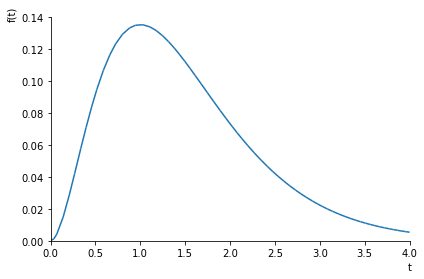

In [36]:
# creating an array of t values using linspace
t = np.linspace(0, 5, 500)

# creating an array to store y(t)
y = t**2 * np.exp(-2 * t)

# finding the max value of y
y_max = np.max(y)
print('the max of y is', y_max)

# finding the value of t where y reaches its max
t_max = t[y == y_max]
print('y is maximal when t =', t_max[0])

# compare with SymPy
T = symbols('t')
Y = T**2 * exp(-2 * T)
plot(Y, (T, 0, 4))

***
**Question 3.**

In [37]:
# computing I numerically
x = np.linspace(0, 5, 50)
y = x / (1 + x)
I_approx = np.trapz(y, x)
print('The approximate value of I is', I_approx)

# computing I exactly
X = symbols('X')
Y = X / (1 + X)
I_exact = integrate(Y, (X, 0, 5))
print('The exact value of I is', I_exact.evalf())

# repeat the calculation with 500 points between 0 and 5
x = np.linspace(0, 5, 500)
y = x / (1 + x)
I_approx2 = np.trapz(y, x)
print('The new approximatoion to I is', I_approx2)

# the approximation has become more accurate

The approximate value of I is 3.207397837710025
The exact value of I is 3.20824053077195
The new approximatoion to I is 3.208232396499138


***
**Question 4.**

In [38]:
g = [3.7, 8.9, 9.8, 3.7, 25, 10, 8.9, 11]

print('The min is', np.min(g))
print('The max is', np.max(g))
print('The mean is', np.mean(g))
print('The median is', np.median(g))

The min is 3.7
The max is 25.0
The mean is 10.125
The median is 9.350000000000001


***
**Question 5.**

In [39]:
A = np.array([[1, 2, 3], [3, 2, 1], [2, 4, 6]])
B = np.array([[1, 5, 0], [0, 1, 1], [4, 3, 1]])

# computing C = A + 2B
C = A + 2 * B
print('C =', C, '\n')

# computing AB and BA
print('AB =', A @ B, '\n')
print('BA =', B @ A, '\n')

C = [[ 3 12  3]
 [ 3  4  3]
 [10 10  8]] 

AB = [[13 16  5]
 [ 7 20  3]
 [26 32 10]] 

BA = [[16 12  8]
 [ 5  6  7]
 [15 18 21]] 



***
**Question 6.**

In [40]:
# computing the transpose of A
A_trans = np.transpose(A)

# printing the result
print('The transpose of A is\n', A_trans, '\n')

The transpose of A is
 [[1 3 2]
 [2 2 4]
 [3 1 6]] 



***
**Question 7.**

In [41]:
A = np.array([[1, 0, 0, -1], [1, -2, 1, 0], [0, 1, -2, 1], [2, 0, 0, 1]])
b = np.array([0, 1, 1, 2])

x = np.linalg.solve(A, b)
print('x =', x)
print('Ax - b = ', A @ x - b)

x = [ 0.66666667 -0.33333333 -0.33333333  0.66666667]
Ax - b =  [1.11022302e-16 2.22044605e-16 0.00000000e+00 0.00000000e+00]


***
## Exercise 8 - Weather prediction

***
**Question 1**

In [42]:
# create the transition matrix
P = np.array([[0.5, 0.3, 0.2], [0.4, 0.2, 0.4], [0.6, 0.2, 0.2]])

# create the state vector for today
x_0 = np.array([1, 0, 0])

# compute the state vector for tomorrow
x_1 = x_0 @ P

print('The probability that it will be sunny tomorrow is', x_1[0])

The probability that it will be sunny tomorrow is 0.5


***
**Question**

In [43]:
x_2 = x_1 @ P
print('The probability that it will rain in two days is', x_2[-1])

The probability that it will rain in two days is 0.26


***
**Question**

In [44]:
# create the state vector for today
x = np.array([1, 0, 0])

# use a for loop to repeatedly calculate xP
for n in range(7):
    x = x @ P
    
print('The seven-day forecast is')
print('Sunny:', round(x[0], 2))
print('Cloudy:', round(x[1], 2))
print('Rainy:', round(x[2], 2))

The seven-day forecast is
Sunny: 0.5
Cloudy: 0.25
Rainy: 0.25
